Empty DataFrame
Columns: [source, target]
Index: []


PermissionError: [Errno 13] Permission denied: 'graph_dataset.csv'

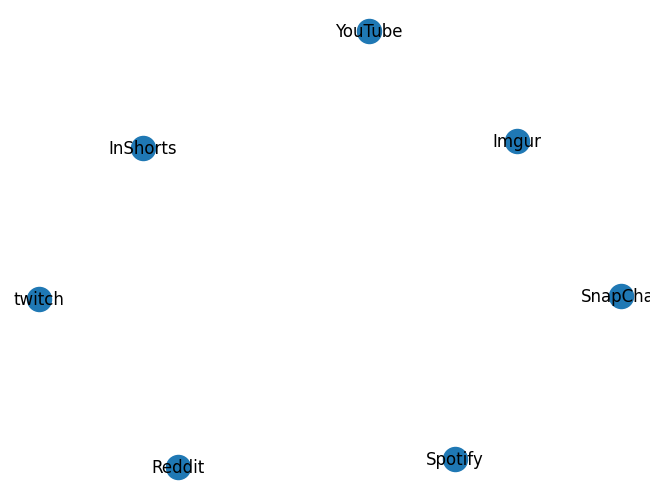

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
df = pd.read_csv("D:\IIT BHU Intership\CSV Files\csv16.csv")


# Step 2: Create a graph
G = nx.Graph()

# Step 3: Add nodes and edges to the graph
for index, row in df.iterrows():
    app_name = row['App Name']
    payload_ratio = row['Payload Ratio']
    G.add_node(app_name, payload_ratio=payload_ratio)

# Step 4: Visualize the graph
pos = nx.spring_layout(G)  # Define the layout for node placement
nx.draw(G, pos, with_labels=True)
node_labels = nx.get_node_attributes(G, 'Payload_Ratio')
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Step 5: Convert the graph to a graph dataset
graph_dataset = nx.to_pandas_edgelist(G)
print(graph_dataset)

# Step 6: Save the graph dataset as a new CSV file
graph_dataset.to_csv('graph_dataset.csv', index=False)

# Step 2: Create a graph
G = nx.Graph()

# Step 3: Add nodes and edges to the graph
for index, row in df.iterrows():
    app_name = row['App Name']
    payload_ratio = row['Payload Ratio']
    G.add_node(payload_ratio,app_name=app_name)

# Step 4: Visualize the graph
pos = nx.spring_layout(G)  # Define the layout for node placement
nx.draw(G, pos, with_labels=True)
node_labels = nx.get_node_attributes(G, 'Payload_Ratio')
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Step 5: Convert the graph to a graph dataset
graph_dataset = nx.to_pandas_edgelist(G)
print(graph_dataset)

# Step 6: Save the graph dataset as a new CSV file
graph_dataset.to_csv('graph_dataset.csv', index=False)


In [ ]:
import pandas as pd
import networkx as nx

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("D:\IIT BHU Intership\CSV Files\csv16.csv")

# Create an empty graph
graph = nx.Graph()

# Iterate over the DataFrame rows
for _, row in df.iterrows():
    app_name = row['App Name']
    payload_ratio = row['Payload Ratio']
    socket = row['Socket']
    
    # Add the node to the graph with the payload ratio as an attribute
    graph.add_node(socket, payload_ratio=payload_ratio)
    
    # Add an edge between the app name and the socket
    graph.add_edge(app_name, socket)

# Print the graph information
print("Graph Nodes:", graph.nodes())
print("Graph Edges:", graph.edges())
print("Node Attributes:")
for node, attrs in graph.nodes(data=True):
    print(node, attrs)


PermissionError: [Errno 13] Permission denied: 'graph_dataset.csv'

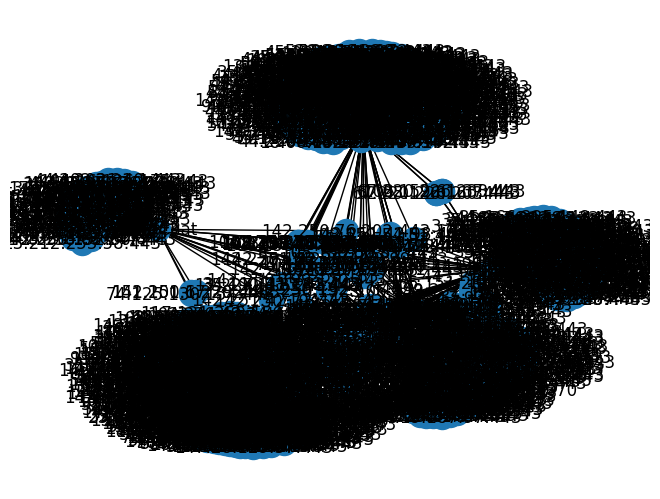

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
df = pd.read_csv("D:\IIT BHU Intership\CSV Files\csv16.csv")

# Step 2: Create a graph
G = nx.Graph()

# Step 3: Add nodes and edges to the graph
for index, row in df.iterrows():
    app_name = row['App Name']
    payload_ratio = row['Payload Ratio']
    socket = row['Socket']
    G.add_node(socket, payload_ratio=payload_ratio)
    G.add_edge(app_name, socket)

# Step 4: Visualize the graph
pos = nx.spring_layout(G)  # Define the layout for node placement
nx.draw(G, pos, with_labels=True)
node_labels = nx.get_node_attributes(G, 'Payload_Ratio')
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Step 5: Convert the graph to a graph dataset
graph_dataset = nx.to_pandas_edgelist(G)

# Step 6: Save the graph dataset as a new CSV file
graph_dataset.to_csv('graph_dataset.csv', index=False)

# Show the graph visualization
plt.show()


In [7]:
import pandas as pd
import networkx as nx
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv

# Step 1: Read the graph dataset from CSV
graph_dataset = pd.read_csv("C:\Github repo\IIT-BHU-Summer-Internship-Network-Security\Jupyter NoteBook\Intro\graph_dataset.csv")

# Step 2: Preprocess the graph dataset
nodes = graph_dataset['source'].unique().tolist()
node_mapping = {node: i for i, node in enumerate(nodes)}
node_labels = [node_mapping[node] for node in graph_dataset['source']]
edges = [(node_mapping[source], node_mapping[target]) for source, target in zip(graph_dataset['source'], graph_dataset['target'])]

# Step 3: Create a graph data object
graph_data = Data(x=torch.tensor(node_labels, dtype=torch.float).view(-1, 1), edge_index=torch.tensor(edges, dtype=torch.long).t().contiguous())

# Step 4: Define the GNN model
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
        
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Step 5: Set up the model, optimizer, and loss function
input_dim = 1
hidden_dim = 16
output_dim = len(nodes)
model = GNNModel(input_dim, hidden_dim, output_dim)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Step 6: Prepare the data and create data loaders
dataset = [graph_data]
loader = DataLoader(dataset, batch_size=1)

# Step 7: Train the model
def train(model, optimizer, criterion, data):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

num_epochs = 100
for epoch in range(num_epochs):
    total_loss = 0
    for data in loader:
        loss = train(model, optimizer, criterion, data)
        total_loss += loss
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}")

# Step 8: Test the model
model.eval()
output = model(graph_data.x, graph_data.edge_index)
predicted_labels = output.argmax(dim=1)
predicted_nodes = [nodes[i] for i in predicted_labels]

# Step 9: Print the predicted app names
print("Predicted App Names:")
for i, node in enumerate(nodes):
    print(f"Node: {node}, Predicted App Name: {predicted_nodes[i]}")


KeyError: '142.250.193.195:443'

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch_geometric.transforms as T
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load and preprocess the data
df = pd.read_csv("D:\IIT BHU Intership\CSV Files\csv16.csv")

# Label encode the App Name column
label_encoder = LabelEncoder()
df['App Name'] = label_encoder.fit_transform(df['App Name'])

# Normalize the Payload Ratio column
scaler = StandardScaler()
df['Payload Ratio'] = scaler.fit_transform(df['Payload Ratio'].values.reshape(-1, 1))

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Prepare graph data
x = torch.tensor(train_df[['Payload Ratio']].values, dtype=torch.float)
y = torch.tensor(train_df['App Name'].values, dtype=torch.long)
edges = []
for socket in train_df['Socket']:
    ip, port = socket.split(':')
    edges.append((int(ip.replace('.', '')), int(port)))
edges = torch.tensor(edges, dtype=torch.long).t()


# Create a graph dataset
graph_data = Data(x=x, edge_index=edges, y=y)

# Define the GNN model
class GNNModel(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(in_features, hidden_features)
        self.conv2 = GCNConv(hidden_features, out_features)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Instantiate the GNN model
gnn_model = GNNModel(in_features=1, hidden_features=16, out_features=label_encoder.classes_.shape[0])

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(gnn_model.parameters(), lr=0.01)

# Training loop
gnn_model.train()
for epoch in range(100):
    optimizer.zero_grad()
    out = gnn_model(graph_data.x, graph_data.edge_index)
    loss = criterion(out[train_idx], graph_data.y[train_idx])
    loss.backward()
    optimizer.step()

# Testing
gnn_model.eval()
with torch.no_grad():
    out = gnn_model(graph_data.x, graph_data.edge_index)
    predicted_labels = torch.argmax(out[test_idx], dim=1)

# Decode predicted labels
predicted_app_names = label_encoder.inverse_transform(predicted_labels)

# Evaluate the predictions
test_labels = graph_data.y[test_idx]
accuracy = (predicted_labels == test_labels).sum().item() / len(test_labels)

print('Accuracy:', accuracy)
print('Predicted App Names:', predicted_app_names)
print('True App Names:', label_encoder.inverse_transform(test_labels))


RuntimeError: index 8081 is out of bounds for dimension 0 with size 6521

In [8]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import DataLoader
from torch_geometric.nn import GCNConv
from sklearn.model_selection import train_test_split

# Step 1: Read the graph dataset from CSV
graph_dataset = pd.read_csv("C:\Github repo\IIT-BHU-Summer-Internship-Network-Security\Jupyter NoteBook\Intro\graph_dataset.csv")

# Step 2: Preprocess the graph dataset
X = graph_dataset.drop(['source'], axis=1)
y = graph_dataset['target']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Convert the dataset to tensors
x_train = torch.tensor(X_train.values)
y_train = torch.tensor(y_train.values)
x_test = torch.tensor(X_test.values)
y_test = torch.tensor(y_test.values)

# Step 5: Create a custom GNN model
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
        
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Step 6: Set up the model, optimizer, and loss function
input_dim = X.shape[1]
hidden_dim = 16
output_dim = len(graph_dataset['App Name'].unique())
model = GNNModel(input_dim, hidden_dim, output_dim)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Step 7: Train the model
def train(model, optimizer, criterion, x, edge_index, y):
    model.train()
    optimizer.zero_grad()
    out = model(x, edge_index)
    loss = criterion(out, y)
    loss.backward()
    optimizer.step()
    return loss.item()

num_epochs = 100
for epoch in range(num_epochs):
    loss = train(model, optimizer, criterion, x_train, edge_index, y_train)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss:.4f}")

# Step 8: Evaluate the model
model.eval()
with torch.no_grad():
    out = model(x_test, edge_index)
    predicted_labels = out.argmax(dim=1)
    accuracy = (predicted_labels == y_test).sum().item() / y_test.size(0)
    print(f"Accuracy: {accuracy:.4f}")


TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.